<a href="https://www.kaggle.com/code/nelson96/03-regresion-logistica-ipynb?scriptVersionId=92867753" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>

## <center>Introducci&oacute;n a Ciencia de Datos</center>
#### <center>Regresi&oacute;n Log&iacute;stica - Dataset Titanic</center>

#### Links interesantes
 * pandas.pydata.org
 * scikit-yb.org
 * matplotlib.org
 * seaborn.pydata.org
 * scikit-yb.org


##### Importamos todas las librerías que vamos a necesitar

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

from yellowbrick.classifier import DiscriminationThreshold
from yellowbrick.classifier import ROCAUC

import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

##### Cargamos el dataset sobre el cual vamos a trabajar

In [2]:
ds_train=pd.read_csv("https://drive.google.com/uc?export=download&id=11gdY1Iw5J8MjCb9RbUniUuynOkPTud7y")
ds_trabajo=ds_train.copy()

## Análisis exploratorio

##### Listar la cantidad de filas y columnas que tiene el dataset

In [3]:
ds_trabajo.shape

(891, 12)

Este dataset contiene 891 filas y 12 columnas

##### Listar los nombres de las columnas del dataset

In [4]:
ds_trabajo.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

<b>Descripción de los campos</b><br>
PassengerId: Identificador del pasajero dentro de la tabla<br>
Survived: Indica si el pasajero sobrevivió<br>
Pclass: clase de pasajero primera(1), segunda (2) o tercera (3) <br>
Name: Nombre del pasajero <br>
Sex: Sexo del pasajero<br>
Age: Edad<br>
SibSp: Cantidad de hermanas/os o esposas/os a bordo<br>
Parch: Cantidad de padres o hijos a bordo<br>
Ticket: Número de ticket<br>
Fate: Tarifa <br>
Cabin: Cabina en la cual se encuentra alojado el pasajero<br>
Embarked: Puerta de embarque<br>

##### Mostrar algunas filas del dataframe

In [5]:
ds_trabajo.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



### <font color='red'>To do (tarea) </font>
##### <font color='red'> Un an&aacute;lisis exploratorio de este dataset lo realizamos la clase pasada, ahora te proponemos continuar esta tarea a vos!  </font>    

## Preprocesamiento

##### <font color='blue'> A&uacute;n no explicamos todos los conceptos necesarios para realizar un preprocesamiento de datos exhaustivo. (paciencia, esto lo vas a ir adquiriendo a lo largo del curso) </font>
##### <font color='blue'> C&oacute;mo comentamos en clase, vamos a realizar muchas simplificaciones </font>

##### Eliminamos algunas columnas que decidimos no utilizar

In [6]:
columnas_eliminar=['PassengerId','Name',"Ticket"]
ds_trabajo.drop(columnas_eliminar, axis='columns', inplace=True)  #Elimina columna sobre el mismo dataframe
ds_trabajo.columns.tolist()

['Survived',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Cabin',
 'Embarked']

#### Datos nulos

In [7]:
filas_totales=ds_trabajo.shape[0]
print(ds_trabajo.isna().sum()/filas_totales*100)

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64


##### <font color='blue'>Cómo aún no aprendimos como tratar datos nulos, vamos eliminar los valores faltantes. </font>
##### Debido a la gran cantidad de datos nulos en la variable Cabin se decide eliminarla.
##### Para el resto de las variables con datos faltantes se eliminaran las filas que tengan valores nulos en alguna de ellas.

In [8]:
columnas_eliminar_NANs=['Cabin']
ds_trabajo.drop(columnas_eliminar_NANs, axis='columns', inplace=True)
ds_trabajo.columns.tolist()

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [9]:
ds_trabajo=ds_trabajo.dropna()

##### Volvemos a listar la cantidad de Nans

In [10]:
filas_totales=ds_trabajo.shape[0]
print(ds_trabajo.isna().sum()/filas_totales*100)

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64


In [11]:
ds_trabajo.shape

(712, 8)

##### Continuamos trabajando con un dataset de 712 filas y 8 variables

##### <font color='blue'> Muchas veces para trabajar con determinados m&eacute;todos es necesario realizar transformaciones de variables.</font>
##### <font color='blue'> En este caso al utilizar Regresión Logística, y querer utilizar variables categ&oacute;ricas como variables predictoras, necesitamos realizar transformaciones sobre las mismas </font>
##### <font color='blue'> Este tema lo vamor a retomar en la clase de Ingenier&iacute;a de Caracter&iacute;sticas. Por ahora te contamos que cada variable categ&oacute;rica la transformamos en tantas variables dummies como valores distintos pueda tomar. </font>

In [12]:
ds_trabajo = pd.get_dummies(ds_trabajo, columns=["Pclass","Sex","Embarked"])
ds_trabajo.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


#### Divisi&oacute;n Train - Test

In [13]:
columnas_modelo = ds_trabajo.columns.tolist()
columnas_modelo.remove('Survived')

ds_trabajo_x = ds_trabajo[columnas_modelo].copy()
ds_trabajo_y = ds_trabajo['Survived'].copy()

x_train, x_test, y_train, y_test = train_test_split(ds_trabajo_x, ds_trabajo_y, test_size=0.3, random_state=2)

#### Comparamos la distribución de la variable Survived

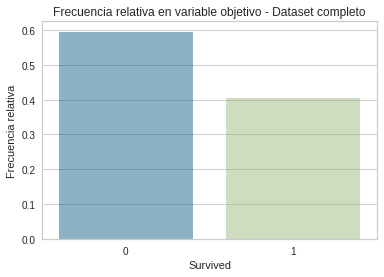

In [14]:
ds_agrupado_survived=ds_agrupado_Pclass=ds_trabajo.groupby(['Survived']).count()  #Calculo la frecuencia de cada categoría
cant_total=ds_trabajo.shape[0]

## Declaramos valores para los ejes
eje_x = ds_agrupado_survived.index.tolist()
eje_y = [i/cant_total for i in ds_agrupado_survived['Age'].tolist()]

sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, data=ds_agrupado_survived ,alpha=0.5).set(title="Frecuencia relativa en variable objetivo - Dataset completo",ylabel='Frecuencia relativa',xlabel='Survived')

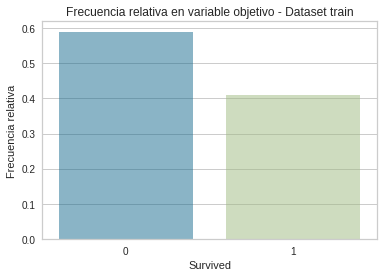

In [15]:
ds_aux=pd.DataFrame(list(zip(y_train)),columns=["Survived"]).reset_index()
ds_agrupado_survived=ds_aux.groupby(['Survived']).count()  #Calculo la frecuencia de cada categoría
cant_total=ds_aux.shape[0]

## Declaramos valores para los ejes
eje_x = ds_agrupado_survived.index.tolist()  
eje_y = [ i/cant_total for i in ds_agrupado_survived['index'].tolist()]

sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, data=ds_agrupado_survived ,alpha=0.5).set(title="Frecuencia relativa en variable objetivo - Dataset train",ylabel='Frecuencia relativa',xlabel='Survived')

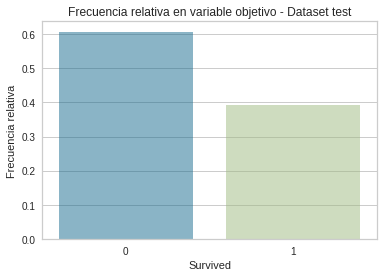

In [16]:
ds_aux=pd.DataFrame(list(zip(y_test)),columns=["Survived"]).reset_index()

ds_agrupado_survived=ds_aux.groupby(['Survived']).count()  #Calculo la frecuencia de cada categoría
ds_agrupado_survived.head()

cant_total=y_test.shape[0]
eje_x = ds_agrupado_survived.index.tolist()   ## Declaramos valores para el eje x
eje_y = [ i/cant_total for i in ds_agrupado_survived['index'].tolist()]  ## Declaramos valores para el eje y

sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, data=ds_agrupado_survived ,alpha=0.5).set(title="Frecuencia relativa en variable objetivo - Dataset test",ylabel='Frecuencia relativa',xlabel='Survived')

### <font color='red'>To do (tarea)</font>
##### <font color='red'> Evaluar c&oacute;mo se comportan los modelos propuestos a continuaci&oacute;n con distintas segmentaciones del dataset original en train y test  </font>    
##### <font color='red'> Probar por ejemplo: </font>   
* ##### <font color='red'> Desbalance de clases en entrenamiento (por ej 90% de las observaciones correspondiente a la clase mayoritaria) </font>   
* ##### <font color='red'> Igual cantidad de muestras en ambas clases </font>   
* ##### <font color='red'> Mayor cantidad de observaciones de la clase minoritaria </font>   

## Clasificación

##### Vamos a proponer 2 modelos

#### Modelo 1
##### Realizar un modelo de regresión logística para predecir la supervivencia en función de Pclass, Sex y Age.

In [17]:
columnas_modelo1 = ['Pclass_1','Pclass_2','Pclass_3', 'Sex_female','Age']
x_train_modelo1 = x_train[columnas_modelo1].copy()
y_train_modelo1 = y_train.copy()

x_test_modelo1 = x_test[columnas_modelo1].copy()
y_test_modelo1 = y_test.copy()

##### Entrenamiento del modelo

In [18]:
modelo1 = LogisticRegression()
modelo1.fit(x_train_modelo1, y_train_modelo1)

y_pred_modelo1 = modelo1.predict(x_test_modelo1)
y_pred_proba_modelo1 = modelo1.predict_proba(x_test_modelo1)[:, 1]

##### Evaluamos al modelo sobre datos de test

##### <font color='blue'> Existen varias m&eacute;tricas para evaluar modelos, en este caso vamos a utilizar AUC</font>

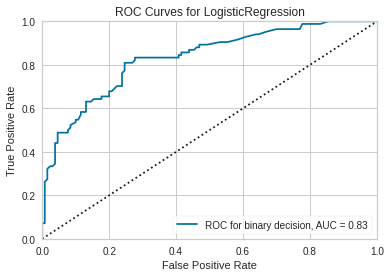

In [19]:
visualizer = ROCAUC(modelo1,binary=True)

visualizer.fit(x_train_modelo1, y_train_modelo1)
visualizer.score(x_test_modelo1, y_test_modelo1)
grf=visualizer.show()

### <font color='red'>To do (tarea)</font>
##### <font color='red'> Evaluar al modelo sobre datos de train y comparar con los resultados anteriores  </font>    

#### Modelo 2
##### Realizar un modelo de regresión logística para predecir la supervivencia en función de Sex y Fare.

In [20]:
columnas_modelo2 = ['Sex_female','Fare']
x_train_modelo2 = x_train[columnas_modelo2].copy()
y_train_modelo2 = y_train.copy()

x_test_modelo2 = x_test[columnas_modelo2].copy()
y_test_modelo2 = y_test.copy()

In [21]:
modelo2 = LogisticRegression()
modelo2.fit(x_train_modelo2, y_train_modelo2)

y_pred_modelo2 = modelo2.predict(x_test_modelo2)
y_pred_proba_modelo2 = modelo2.predict_proba(x_test_modelo2)[:, 1]

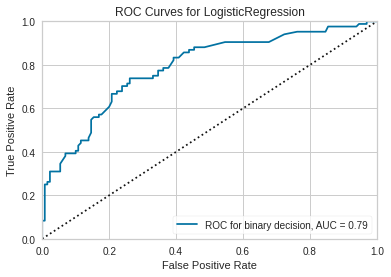

In [22]:
visualizer = ROCAUC(modelo2,binary=True)

visualizer.fit(x_train_modelo2, y_train_modelo2)
visualizer.score(x_test_modelo2, y_test_modelo2)
grf=visualizer.show()

### <font color='red'>To do (tarea)</font>
##### <font color='red'> Evaluar al modelo sobre datos de train y comparar con los resultados anteriores  </font>    

#### Seguimos trabajando con el modelo 1

##### <font color='blue'> Algo importante en clasifici&oacute;n es determinar la probabilidad de corte a partir de la cual una observaci&oacute;n pertenecer&aacute; a una clase u otra </font>
##### <font color='blue'> Para esto vamos a utilizar algunas de las m&eacute;tricas vistas en clase, calcul&aacute;ndolas utilizando validaci&oacute;n cruzada </font>


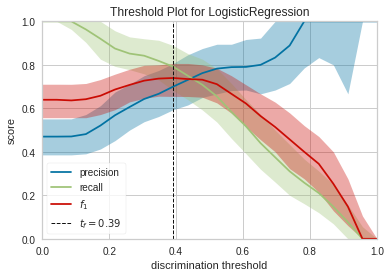

In [23]:
visualizer = DiscriminationThreshold(modelo1, exclude=['queue_rate'],cv=0.3,n_trials=1000,is_fitted=True)
visualizer.fit(x_test_modelo1, y_test_modelo1)
grf=visualizer.show()

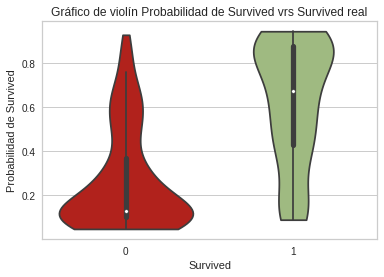

In [24]:
ds_violin_modelo1=pd.DataFrame(list(zip(y_test_modelo1,y_pred_proba_modelo1)),columns=["Survived","Prediction"])

ax = sns.violinplot(x="Survived", y="Prediction", data=ds_violin_modelo1,palette=["r", "g"], cut=0).set(title="Gráfico de violín Probabilidad de Survived vrs Survived real",xlabel='Survived',ylabel='Probabilidad de Survived') 

##### Elegimos 0.4 como valor de corte

In [25]:
ds_cm=pd.DataFrame(list(zip(y_test_modelo1, y_pred_proba_modelo1)),columns=["Survived","Prob"])
ds_cm["Survived_predict"]=0
ds_cm.loc[ds_cm.loc[:,"Prob"]>=0.40,"Survived_predict"]=1

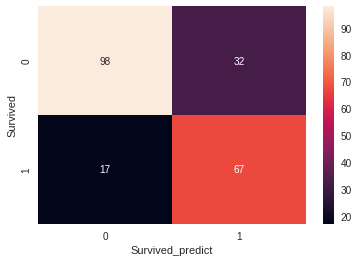

In [26]:
tabla=pd.crosstab(ds_cm['Survived'], ds_cm['Survived_predict'])

grf=sns.heatmap(tabla,annot=True)

### <font color='red'>To do (tarea)</font>
##### <font color='red'> En base a la matriz de confusi&oacute;n anterior calcular e interpretar las siguientes m&eacute;tricas  </font>  

* ##### <font color='red'> Precision </font>   
* ##### <font color='red'> Recall </font>   
* ##### <font color='red'> F1 </font>   
* ##### <font color='red'> TPR  </font>   
* ##### <font color='red'> FPR </font>   